<a href="https://colab.research.google.com/github/rhalnel/2021_Classification/blob/main/DataAnnotationCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = "https://docs.google.com/document/d/2PACX-1vSFTq6KR8ER5h9_bFVliDvYBntK6Wv8L7x6hLp2Sm58Zkhpo7Vsba9BmC82wcy8WoR3Q47J-brCiH3c/export?format=txt"
text = requests.get(url).text

In [2]:
!pip install numpy==1.19.5
!pip install beautifulsoup4==4.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 44.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dis

In [2]:
from pprint import pprint
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [4]:
myurl = "https://docs.google.com/document/d/e/2PACX-1vSFTq6KR8ER5h9_bFVliDvYBntK6Wv8L7x6hLp2Sm58Zkhpo7Vsba9BmC82wcy8WoR3Q47J-brCiH3c/pub"
html = urlopen(myurl).read()
soup = BeautifulSoup(html, 'html.parser')

table = soup.find('table')


print(table)

<table class="c4"><tr class="c7"><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">x-coordinate</span></p></td><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">Character</span></p></td><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">y-coordinate</span></p></td></tr><tr class="c3"><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">48</span></p></td><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">░</span></p></td><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">3</span></p></td></tr><tr class="c3"><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">42</span></p></td><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">█</span></p></td><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">6</span></p></td></tr><tr class="c3"><td class="c0" colspan="1" rowspan="1"><p class="c1"><span class="c2">55</span></p></td><td 

In [6]:
xcoords = []
ycoords = []
character = []

rows = table.find_all('tr')

# Skip header
for row in rows[1:]:
    cells = row.find_all('td')
    xcoords.append(float(cells[0].text.strip()))
    character.append(cells[1].text.strip())
    ycoords.append(float(cells[2].text.strip()))


In [7]:
import matplotlib.pyplot as plt
import numpy as np


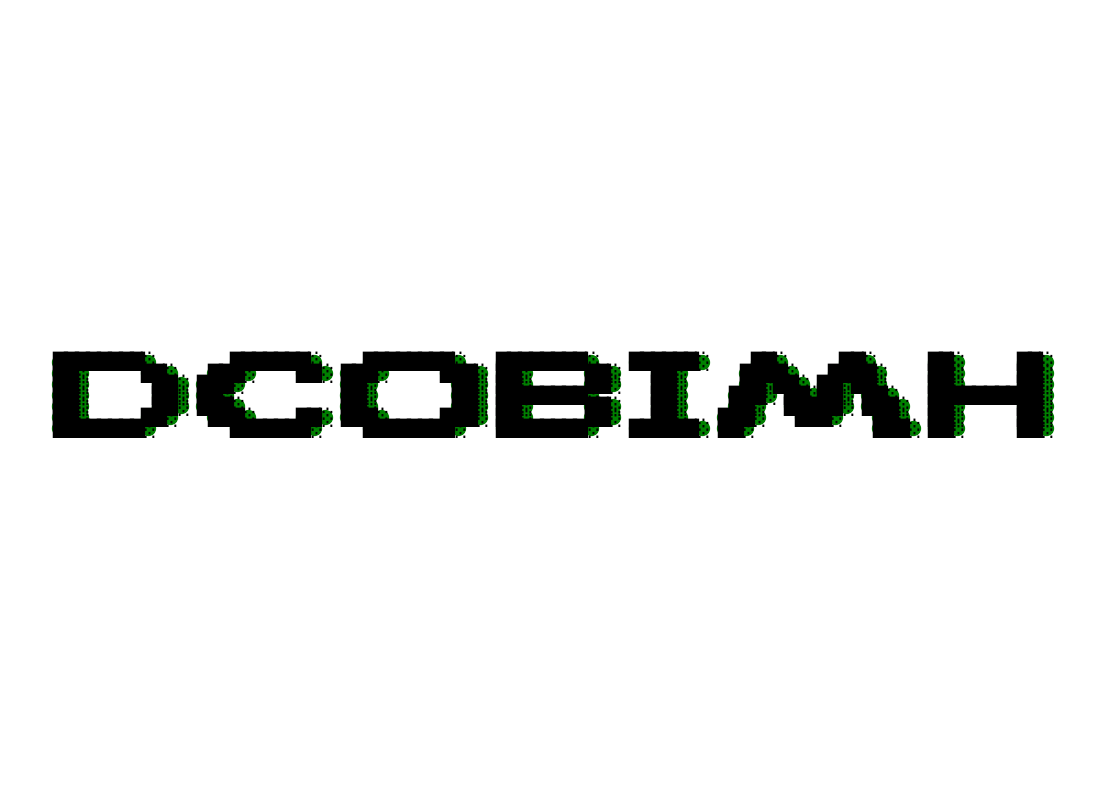

In [8]:
# --- Step 1: Determine grid size ---
x_max = int(max(xcoords))
y_max = int(max(ycoords))

# --- Step 2: Create grid filled with spaces ---
grid = np.full((y_max +1, x_max + 1), '', dtype=str)


# --- Step 3: Fill grid with characters from table ---
for x, y, char in zip(xcoords, ycoords, character):
    grid[int(y)][int(x)] = char  # positions without a character remain " "

# --- Step 4: Plot the grid visually ---
plt.figure(figsize=(14, 10))

# Scatter points (optional, can be hidden if you only want characters)
plt.scatter(xcoords, ycoords, color='green', s=100)

# Add character labels at each point
for y in range(y_max + 1):
    for x in range(x_max + 1):
        char = grid[y][x]
        plt.text(x, y, char, fontsize=14, ha='center', va='center')

plt.axis('equal')  # keep x and y scales the same
plt.axis('off')    # hide axes for a clean view
plt.show()

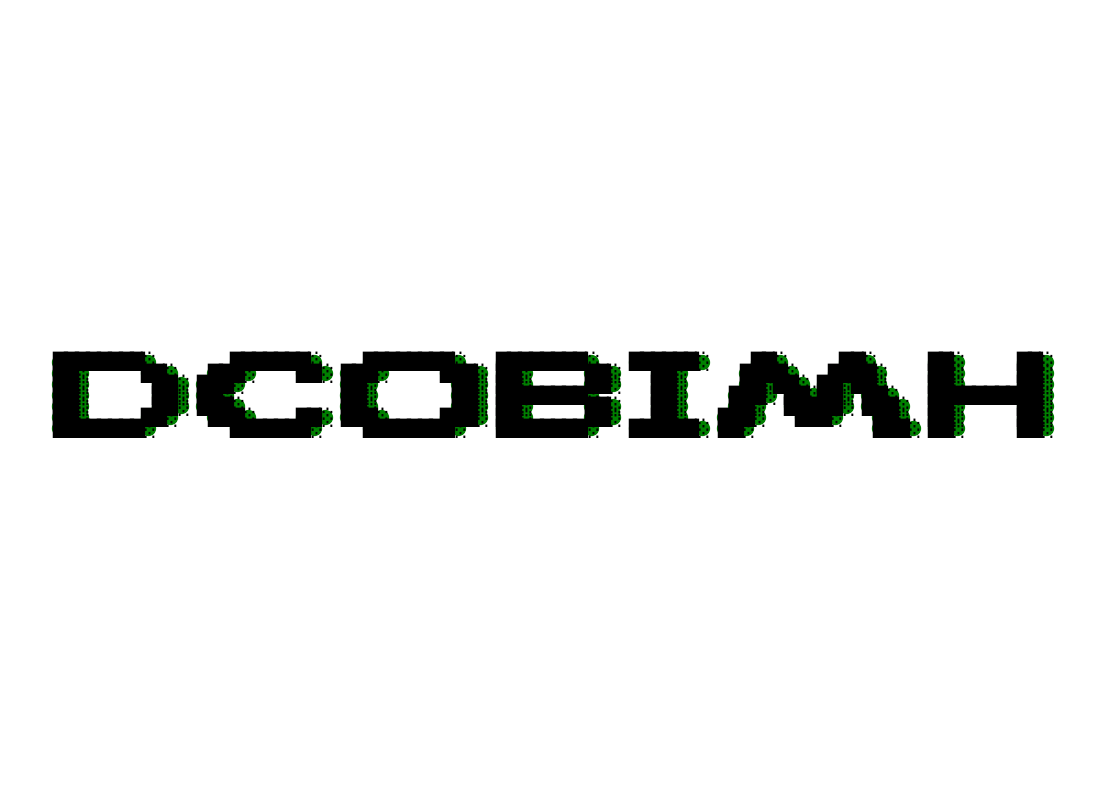

In [9]:
plt.figure(figsize=(14, 10))
plt.scatter(xcoords, ycoords, s=100, color='green')

for i, char in enumerate(character):
    plt.text(xcoords[i], ycoords[i], char, fontsize=14, ha='center', va='center')

plt.axis('equal')
plt.axis('off')
plt.show()